In [1]:
# A file to use the .h5 trained model for visualization and testing purposes.

In [2]:
import sys
sys.path.append('../')  

from data_importer import load_training_images
from data_importer import load_testing_images
from custom_loss_functions import psnr

from tensorflow.keras.models import load_model

import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras import backend as K

from sklearn.model_selection import train_test_split

In [3]:
# We are required to set custom_objects since we are using custom loss function
model = load_model('simple_cnn_50_epoch.h5', custom_objects={'psnr': psnr})
history = np.load('simple_cnn_50_epoch_history.npy', allow_pickle=True).item()

history keys :  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


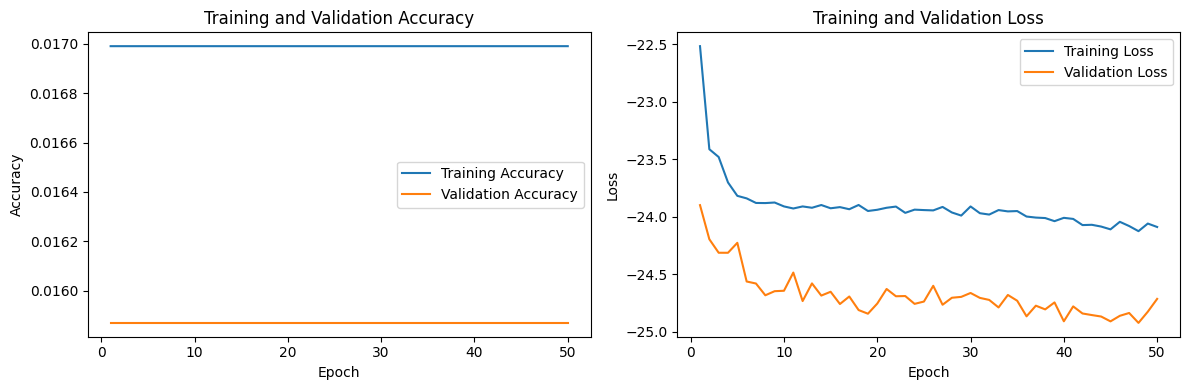

In [4]:
# Visualize model history.
print('history keys : ', history.keys())

# Plot loss, accuracy, val_loss and val_accuracy
import matplotlib.pyplot as plt

# Get the number of epochs
num_epochs = len(history['accuracy'])

# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

loaded testing images x of len :  10
type of test images x :  float64
range of values in test images :  0.0 0.9933411672542107
1/1 [==============================] - 1s 990ms/step
displaying the input image and predictions


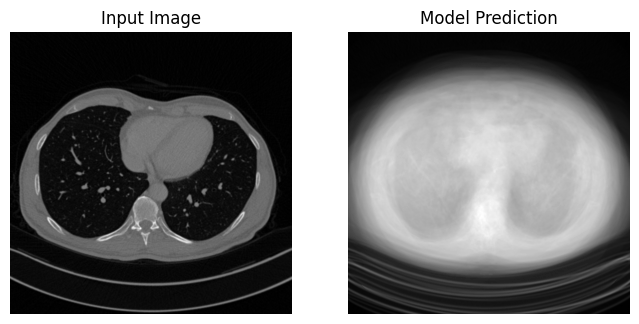

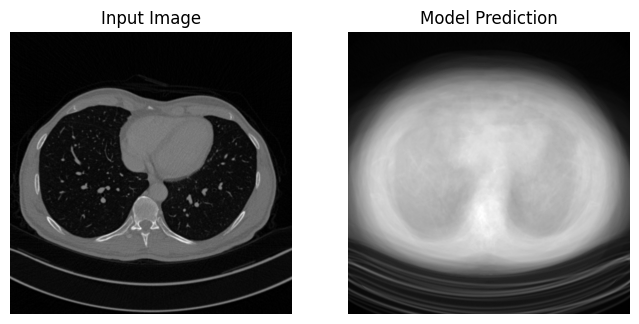

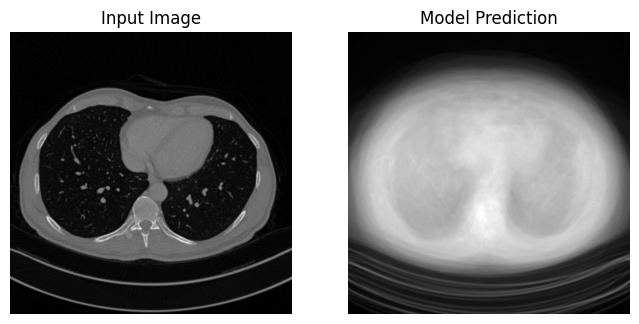

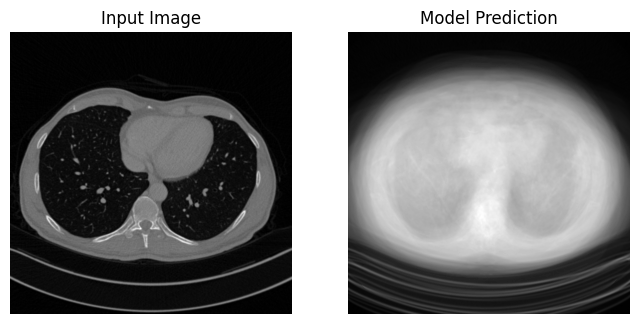

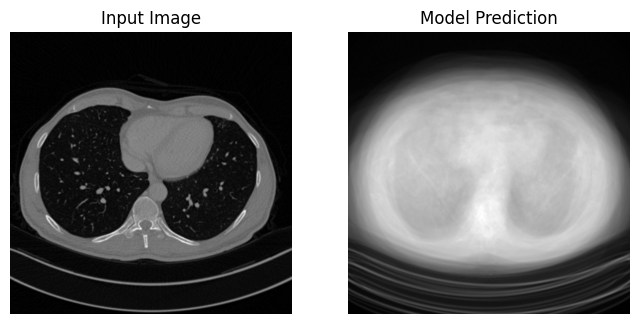

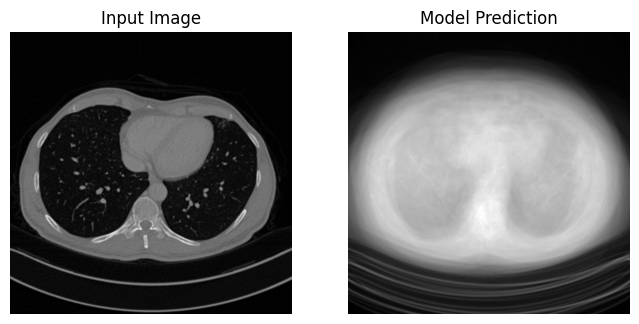

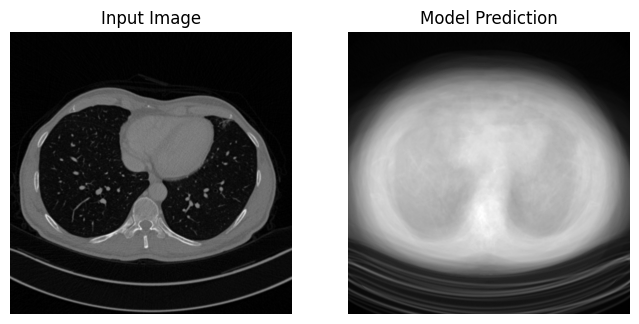

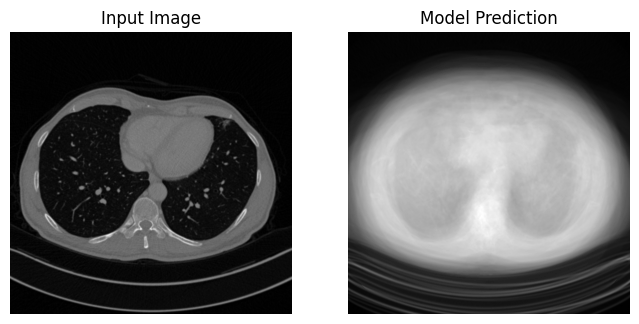

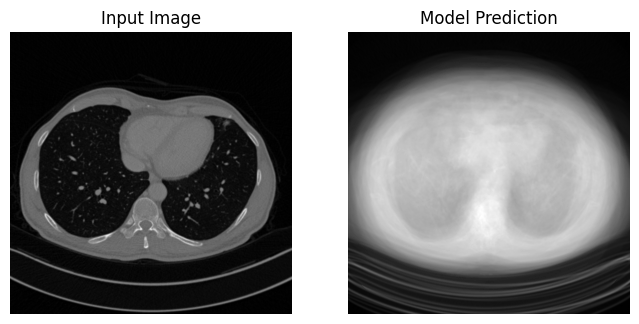

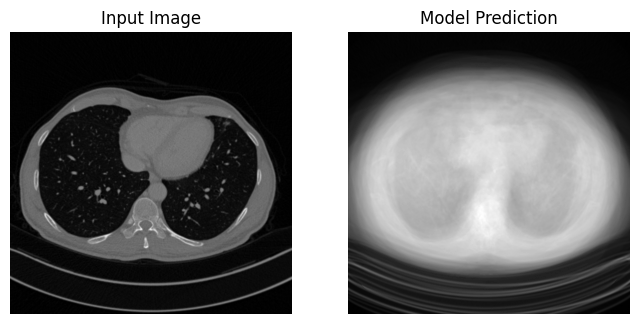

In [6]:
# Load the test images for predictions
test_images = load_testing_images('../../../../../Dataset/LowDoseCTGrandChallenge/Testing_Image_Data', load_limited_images=True, num_images_to_load=10)

predictions = model.predict(test_images)

print('displaying the input image and predictions')

for i in range(len(test_images)):
    plt.figure(figsize=(8, 4))

    # Display the input image
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(test_images[i]), cmap='gray')  # Assuming grayscale images
    plt.title('Input Image')
    plt.axis('off')

    # Display the prediction
    plt.subplot(1, 2, 2)
    plt.imshow(np.squeeze(predictions[i]), cmap='gray')  # Assuming grayscale images
    plt.title('Model Prediction')
    plt.axis('off')

    plt.show()